In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error
import warnings
warnings.filterwarnings('ignore')

# Preprocesado y modelado
# ==============================================================================
from sklearn.impute import KNNImputer
from scipy.stats import pearsonr
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import max_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from scipy import stats
from sklearn import tree


from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import r2_score

In [2]:
path_file = '/work/NFLX.csv'
#path_file = '/work/nflx_2014_2023.csv'
df_data_original = pd.read_csv(path_file, low_memory=False)
df_data = df_data_original.copy()

### Exploracion de datos

In [3]:
df_data.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
5,2018-02-12,252.139999,259.149994,249.000000,257.950012,257.950012,8534900
6,2018-02-13,257.290009,261.410004,254.699997,258.269989,258.269989,6855200
7,2018-02-14,260.470001,269.880005,260.329987,266.000000,266.000000,10972000
8,2018-02-15,270.029999,280.500000,267.630005,280.269989,280.269989,10759700
9,2018-02-16,278.730011,281.959991,275.690002,278.519989,278.519989,8312400


In [4]:
df_data.shape

(1009, 7)

In [5]:
df_data.info()
df_data.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


,count,mean,std,min,25%,50%,75%,max
Open,1009.0,4.190597e+02,1.085375e+02,2.339200e+02,3.314900e+02,3.777700e+02,5.091300e+02,6.923500e+02
High,1009.0,4.253207e+02,1.092630e+02,2.506500e+02,3.363000e+02,3.830100e+02,5.156300e+02,7.009900e+02
Low,1009.0,4.123740e+02,1.075559e+02,2.312300e+02,3.260000e+02,3.708800e+02,5.025300e+02,6.860900e+02
Close,1009.0,4.190007e+02,1.082900e+02,2.338800e+02,3.316200e+02,3.786700e+02,5.090800e+02,6.916900e+02
Adj Close,1009.0,4.190007e+02,1.082900e+02,2.338800e+02,3.316200e+02,3.786700e+02,5.090800e+02,6.916900e+02
Volume,1009.0,7.570685e+06,5.465535e+06,1.144000e+06,4.091900e+06,5.934500e+06,9.322400e+06,5.890430e+07


### Verificacion de datos nulos

In [6]:
df_data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

### Comparación entre la columna Close y Adj Close para determinar si la columna Adj Close puede ser omitida o no

In [7]:
# Crear una nueva columna que contenga la diferencia entre Close y Adj Close
df_data['Close_AdjClose_Diff'] = df_data['Close'] - df_data['Adj Close']

# Mostrar las primeras filas para visualizar las diferencias
#print(df_data[['Close', 'Adj Close', 'Close_AdjClose_Diff']].head())

In [8]:
diff_stats = df_data['Close_AdjClose_Diff'].describe()
diff_stats

count    1009.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: Close_AdjClose_Diff, dtype: float64

In [9]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 1009 non-null   object 
 1   Open                 1009 non-null   float64
 2   High                 1009 non-null   float64
 3   Low                  1009 non-null   float64
 4   Close                1009 non-null   float64
 5   Adj Close            1009 non-null   float64
 6   Volume               1009 non-null   int64  
 7   Close_AdjClose_Diff  1009 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 63.2+ KB


In [10]:
df_data= df_data.drop(['Adj Close', 'Close_AdjClose_Diff'], axis=1)
#df_data= df_data.drop(['rsi_7', 'rsi_14', 'cci_7', 'cci_14', 'sma_50', 'ema_50', 'sma_100', 'ema_100', 'macd', 'bollinger', 'TrueRange', 'atr_7', 'atr_14','next_day_close'], axis=1)

In [11]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1009 non-null   object 
 1   Open    1009 non-null   float64
 2   High    1009 non-null   float64
 3   Low     1009 non-null   float64
 4   Close   1009 non-null   float64
 5   Volume  1009 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 47.4+ KB


### Dividimos en variable features (X) y en variable target (Y)

In [12]:
train, test = train_test_split(df_data, test_size = 0.2, random_state = 42, shuffle = True)

In [13]:
test_pred = test.copy()

In [14]:
X_train = train[['Open', 'High', 'Low', 'Volume']].values
X_test = test[['Open', 'High', 'Low', 'Volume']].values

#X_train = train[['open', 'high', 'low', 'volume']].values
#X_test = test[['open', 'high', 'low', 'volume']].values

In [15]:
y_train = train['Close'].values
y_test = test['Close'].values

#y_train = train['close'].values
#y_test = test['close'].values

In [16]:
#X = df_data.drop(columns=['Close','Date'])  # Eliminamos "Date" también ya que no es relevante para la predicción
#y = df_data['Close']

In [17]:
#X_train, X_test, y_train, y_test = train_test_split(
    #X.values,
    #y.values.reshape(-1,1),
    #train_size   = 0.80,
    #random_state = 42,
    #shuffle      = True)

In [18]:
dict_div_data = {
    'Cantidad de Train': [len(X_train), len(y_train)],
    'Cantidad de Test': [len(X_test), len(y_test)]
}

df_div_data = pd.DataFrame.from_dict(dict_div_data, orient='index', columns=['Cantidad de Train','Cantidad de Test'])
print(df_div_data)

                   Cantidad de Train  Cantidad de Test
Cantidad de Train                807               807
Cantidad de Test                 202               202


In [19]:
# Modelo 1: Regresión Lineal Múltiple
model_1 = LinearRegression()
model_1.fit(X_train, y_train)

LinearRegression()

In [20]:
# Hacer predicciones con el conjunto de prueba
y_pred_model_1 = model_1.predict(X_test)

In [21]:
# Evaluación del modelo de regresión lineal
mse_model_1 = mean_squared_error(y_test, y_pred_model_1)
r2_model_1 = r2_score(y_test, y_pred_model_1)
rmse_model_1 = np.sqrt(mean_squared_error(y_test, y_pred_model_1))
mae_model_1 = mean_absolute_error(y_test, y_pred_model_1)
mape_model_1 = mean_absolute_percentage_error(y_test, y_pred_model_1)

In [22]:
# Modelo 2: Árbol de Decisión (Regresión)
model_2 = DecisionTreeRegressor(random_state=42)
model_2.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [23]:
# Hacer predicciones con el conjunto de prueba
y_pred_model_2 = model_2.predict(X_test)

In [24]:
# Evaluación del modelo de Árbol de Decisión
mse_model_2 = mean_squared_error(y_test, y_pred_model_2)
r2_model_2 = r2_score(y_test, y_pred_model_2)
rmse_model_2 = np.sqrt(mean_squared_error(y_test, y_pred_model_2))
mae_model_2 = mean_absolute_error(y_test, y_pred_model_2)
mape_model_2 = mean_absolute_percentage_error(y_test, y_pred_model_2)

In [25]:
dict_metrics_data = {
    'Mean Squared Error': [mse_model_1, mse_model_2],
    'R2_Score': [r2_model_1, r2_model_2],
    'RMSE': [rmse_model_1, rmse_model_2],
    'MAE': [mae_model_1, mae_model_2],
    'MAPE': [mape_model_1, mape_model_2],
}

df_metrics_data = pd.DataFrame.from_dict(dict_metrics_data, orient='index', columns=['Regresion Lineal','Arbol de decisión'])
print(df_metrics_data)

                    Regresion Lineal  Arbol de decisión
Mean Squared Error         15.976946          50.382512
R2_Score                    0.998630           0.995679
RMSE                        3.997117           7.098064
MAE                         2.857187           4.971931
MAPE                        0.007256           0.012394


Regresión Lineal Múltiple:
*Mean Squared Error (MSE): 15.98
*R² (coeficiente de determinación): 0.9986 (indica un ajuste excelente del modelo).
*RMSE (Root Mean Squared Error): 3.997
*MAE (Mean Absolute Error): 2.857
*MAPE (Mean Absolute Percentage Error): 0.007

Árbol de Decisión:
*Mean Squared Error (MSE): 50.38
*R² (coeficiente de determinación): 0.9957
*RMSE (Root Mean Squared Error): 7.098
*MAE (Mean Absolute Error):4.972
*MAPE (Mean Absolute Percentage Error): 0.012

Ambos modelos presentan un excelente rendimiento, pero la regresión lineal parece ajustarse mejor en este caso. Todos los coeficientes (R2, RMSE, MAE y MAPE) están mas cercanos a 0 con respecto al modelo Árbol de Decisión, además el valor de MSE es mucho menor para el caso de Regresión Lineal. Esto nos indica que el modelo de Regresión Lineal realiza un mejor prediccion de la variable objetivo 'Close'.

### Se realiza una predicción  con los siguientes datos de prueba

Open: 262.000000
High: 267.899994
Low: 250.029999
Volume: 11896100

In [26]:
result = model_1.predict([[262.000000, 267.899994, 250.029999, 11896100]])
result

array([257.74532336])

### Visualización

In [27]:
def style():
    plt.figure(facecolor='black', figsize=(15,10))
    ax = plt.axes()

    ax.tick_params(axis='x', colors='white')    #setting up X-axis tick color to white
    ax.tick_params(axis='y', colors='white')    #setting up Y-axis tick color to white

    ax.spines['left'].set_color('white')        #setting up Y-axis spine color to white
    #ax.spines['right'].set_color('white')
    #ax.spines['top'].set_color('white')
    ax.spines['bottom'].set_color('white')      #setting up X-axis spine color to white

    ax.set_facecolor("black")                   # Setting the background color of the plot using set_facecolor() method

In [28]:
df_data['Date']=pd.to_datetime(df_data['Date'],format='%Y-%m-%d')
#df_data['date']=pd.to_datetime(df_data['date'],format='%Y-%m-%d')

In [29]:
data = pd.DataFrame(df_data[['Date','Close']])
#data = pd.DataFrame(df_data[['date','close']])
data=data.reset_index()
data=data.drop('index',axis=1)
data.set_index('Date', inplace=True)
#data.set_index('date', inplace=True)
data = data.asfreq('D')
data

,Close
Date,
2018-02-05,254.259995
2018-02-06,265.720001
2018-02-07,264.559998
2018-02-08,250.100006
2018-02-09,249.470001
...,...
2022-01-31,427.140015
2022-02-01,457.130005
2022-02-02,429.480011


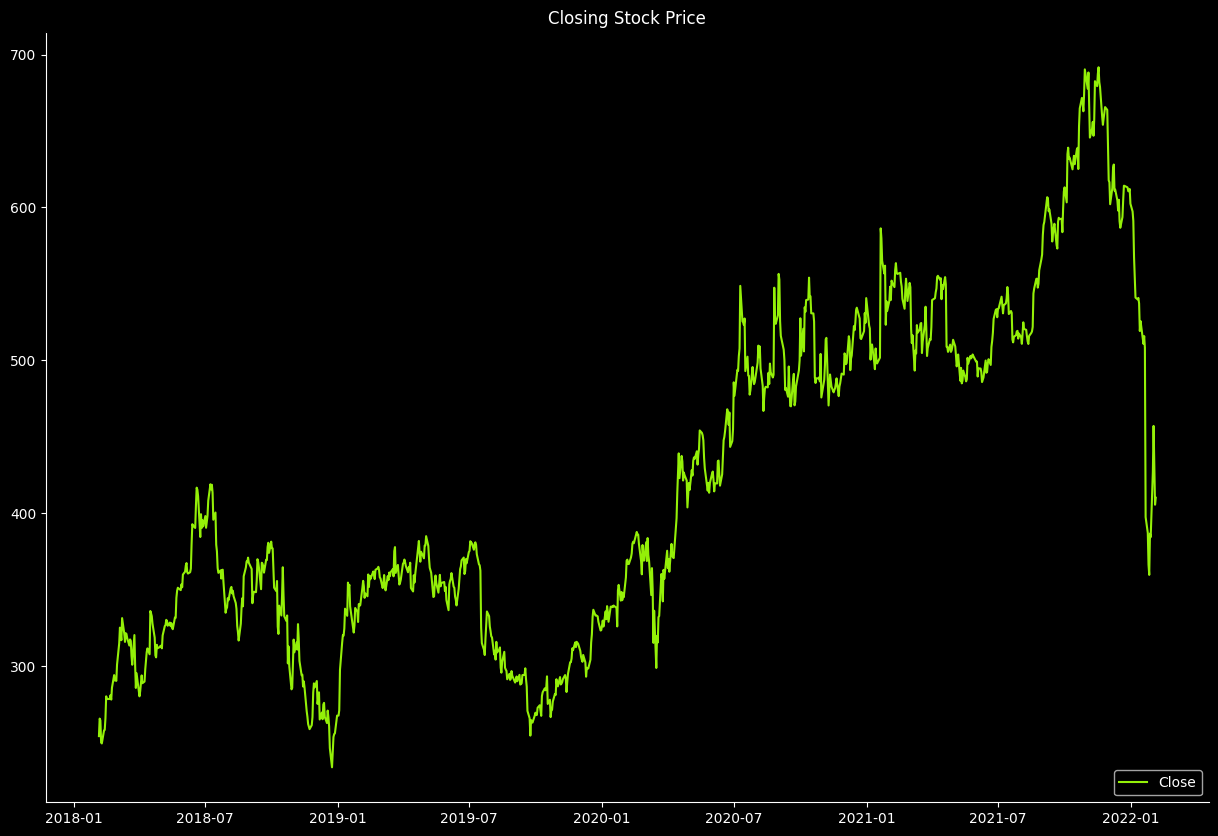

In [30]:
style()

plt.title('Closing Stock Price', color="white")
plt.plot(df_data.Date, df_data.Close, color="#94F008")
plt.legend(["Close"], loc ="lower right", facecolor='black', labelcolor='white')
#plt.plot(df_data.date, df_data.close, color="#94F008")
#plt.legend(["close"], loc ="lower right", facecolor='black', labelcolor='white')

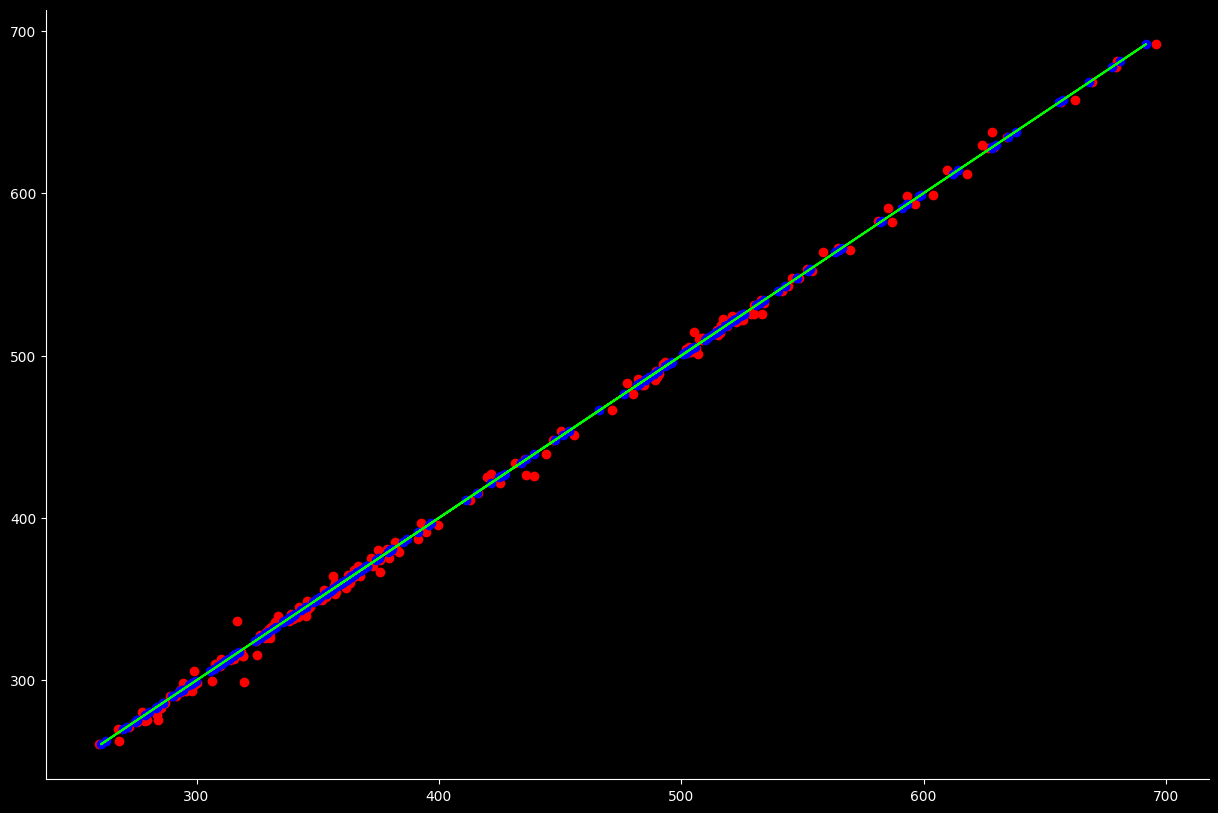

In [31]:
style()

plt.scatter(y_pred_model_1, y_test, color='red', marker='o')
plt.scatter(y_test, y_test, color='blue')
plt.plot(y_test, y_test, color='lime')

Unimos el DataFrame de X_test e y_test en un solo DataFrame y ademas le vamos a agregar la columna 'Close_Prediction'

In [32]:
test_pred ['Close_Prediction'] = y_pred_model_1
test_pred

,Date,Open,High,Low,Close,Volume,Close_Prediction
628,2020-08-04,498.649994,510.440002,498.649994,509.640015,5608000,508.503210
631,2020-08-07,505.450012,508.290009,486.679993,494.730011,5910300,492.622129
741,2021-01-14,507.350006,514.500000,499.579987,500.859985,4177400,506.904498
514,2020-02-21,385.329987,387.320007,377.899994,380.070007,3930100,380.941828
365,2019-07-19,323.399994,325.850006,314.230011,315.100006,16302500,319.219895
...,...,...,...,...,...,...,...
780,2021-03-12,512.500000,526.510010,506.589996,518.020020,3981700,519.060313
334,2019-06-05,354.380005,357.880005,348.709991,355.730011,5020100,352.755201
210,2018-12-04,288.130005,295.739990,274.720001,275.329987,12800600,284.160124
350,2019-06-27,363.200012,370.850006,363.200012,370.019989,4138600,369.504603


In [33]:
test_pred[['Close', 'Close_Prediction']].describe().T
#test_pred[['close', 'Close_Prediction']].describe().T

,count,mean,std,min,25%,50%,75%,max
Close,202.0,416.304405,108.250030,260.579987,331.755004,370.269989,508.617508,691.690002
Close_Prediction,202.0,416.855831,107.880648,259.743634,330.203804,371.185767,506.702853,695.782602


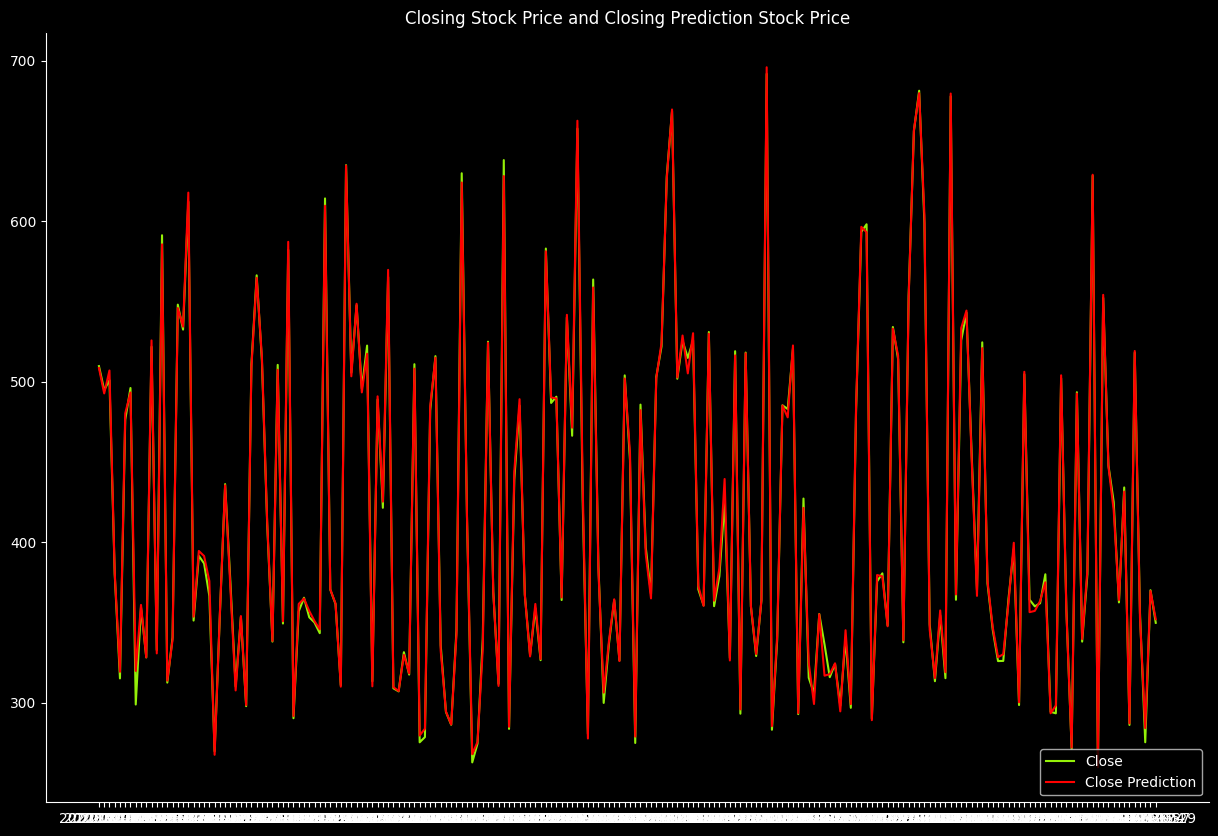

In [34]:
style()

plt.title('Closing Stock Price and Closing Prediction Stock Price', color="white")
plt.plot(test_pred.Date, test_pred.Close, color="#94F008")
plt.plot(test_pred.Date, test_pred.Close_Prediction, color="red")
plt.legend(["Close","Close Prediction"], loc ="lower right", facecolor='black', labelcolor='white')
#plt.plot(test_pred.date, test_pred.close, color="#94F008")
#plt.plot(test_pred.date, test_pred.Close_Prediction, color="red")
#plt.legend(["close","Close Prediction"], loc ="lower right", facecolor='black', labelcolor='white')

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=3a01106f-2efe-4a6d-9525-ff214d54b23e' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>